In [1]:
import os
import seaborn as sns
import pandas as pd
import random
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt


In [3]:
interations = 10000
bias_type = 'random_A_B'
csv_file = f'/home/diego.moreira/FairPIVARA/results_in_csv_{bias_type}_{interations}.csv'

In [4]:
pares = 20
original_values = np.array([1.4252794981002808, 0.9186360239982605, -1.0560377836227417, -0.9705951809883118, -0.5649810433387756, -1.0659263134002686, 0.5286650061607361, -0.13093699514865875, -0.653122067451477, 0.7998924255371094, -0.0035296129062771797, -1.655595064163208, -1.5960325002670288, -0.725359320640564, -1.710771918296814, -1.6722334623336792, -1.5765864849090576, -1.5342515707015991, -0.18285144865512848, -1.334985613822937])

<Axes: xlabel='e', ylabel='Count'>

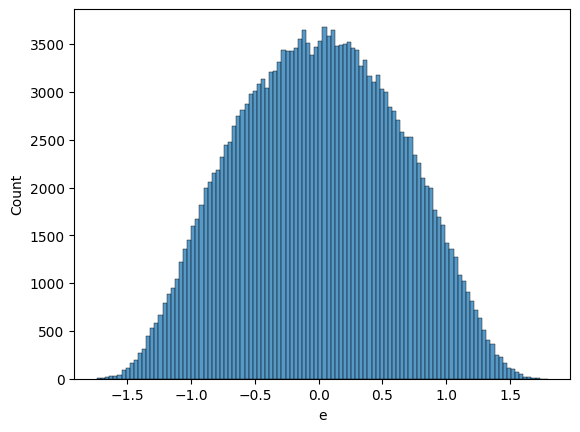

In [6]:
#Plot de todos os valores de bias 'e'
df = pd.read_csv(csv_file)
sns.histplot(data=df,x='e')

<Axes: ylabel='Count'>

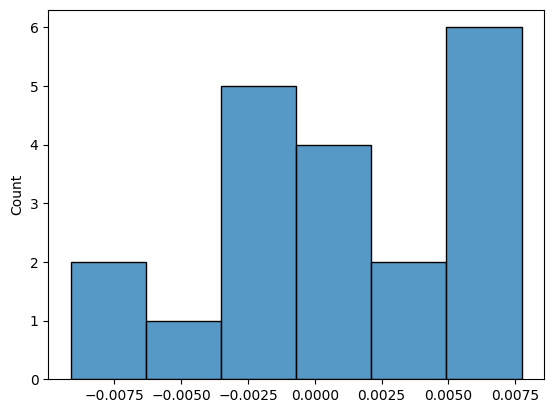

In [7]:
mean_e_per_concept_geral = [0] * pares
sum = 0
for i in range(len(df)):
    mean_e_per_concept_geral[i % pares] += df['e'][i]  
mean_e_per_concept_geral = [x / interations for x in mean_e_per_concept_geral]
sns.histplot(data=mean_e_per_concept_geral,stat='count')

<Axes: ylabel='Count'>

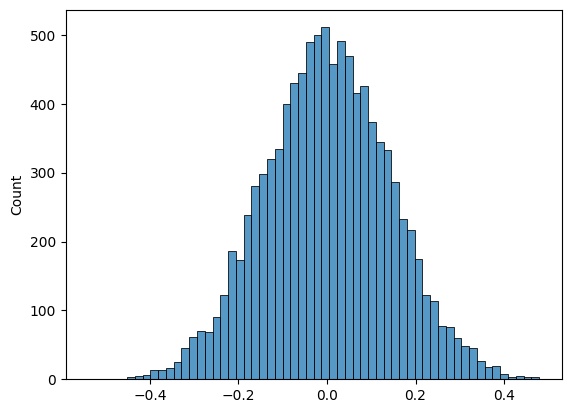

In [8]:
mean_e = []
for i in range(0,len(df),pares):
    mean_e.append(df.iloc[i:i+pares,-1:].values.squeeze().mean())
sns.histplot(data=mean_e,stat='count')

<Axes: ylabel='Count'>

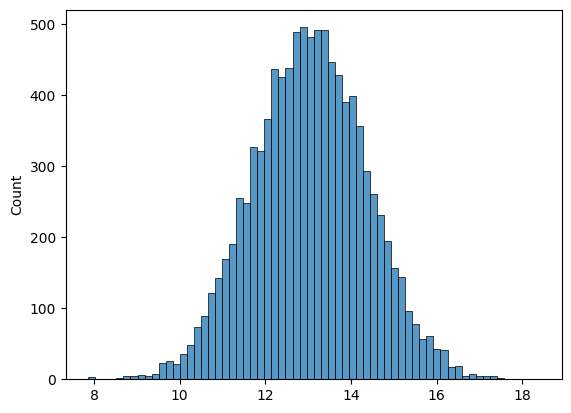

In [9]:
sum_e = []
for i in range(0,len(df),pares):
    sum_e.append(abs(abs(original_values)-abs(df.iloc[i:i+pares,-1:].values.squeeze())).sum())
sns.histplot(data=sum_e,stat='count')

In [10]:
print(f'Média de redução do Bias: {np.mean(sum_e)},{np.std(sum_e)}')

Média de redução do Bias: 13.035287625834235,1.3247877121563307


In [11]:
for concept_value in df:
    print(f'{concept_value}: {np.mean(df[concept_value])}')

# Violin Plots

## Original CLIP

In [2]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list=''
repetitions='1'
bias_type='same_as_X'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{remove_dimensions_list},repetitions-{repetitions},bias_type-{bias_type}'

In [3]:
df = pd.read_csv(csv_file)

In [4]:
df['Score/Quant'] = df['Score']/abs(df['Quant'])
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('person','')

In [5]:
df

,Global Concept,Micro Concept,Concept,Quant,Score,Score/Quant,ScoreNorm
0,Disability,Mental Disability,sad,-224,-56.098881,-0.250441,-1.000000
1,Disability,Mental Disability,worried,-222,-55.812746,-0.251409,-0.994922
2,Disability,Mental Disability,unhappily,-213,-52.582078,-0.246864,-0.937591
3,Disability,Mental Disability,unhappy,-203,-50.768047,-0.250089,-0.905400
4,Disability,Mental Disability,uncaring,-207,-49.693657,-0.240066,-0.886334
...,...,...,...,...,...,...,...
1472,Sexual Orientation,LGBT,peace,115,21.252847,0.184807,0.372674
1473,Sexual Orientation,LGBT,bright,120,22.295605,0.185797,0.391179
1474,Sexual Orientation,LGBT,delighted,132,25.093931,0.190106,0.440838
1475,Sexual Orientation,LGBT,saintly,143,26.089432,0.182444,0.458504


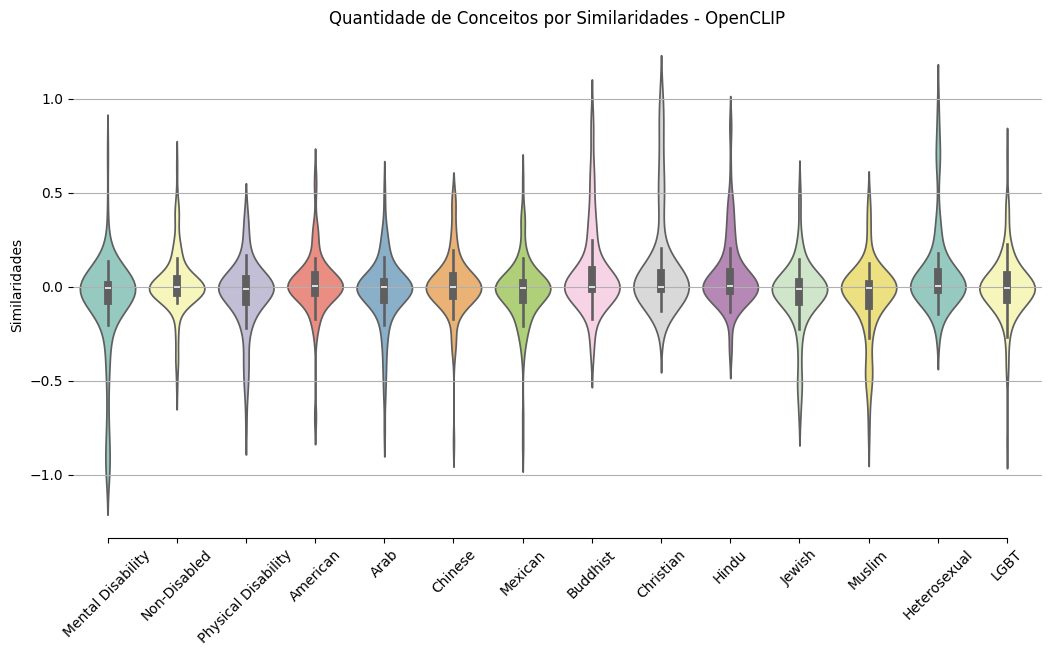

In [6]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP")

# Remove border box
sns.despine(trim=True, left=True);

### Resultados apenas para Mental Disability

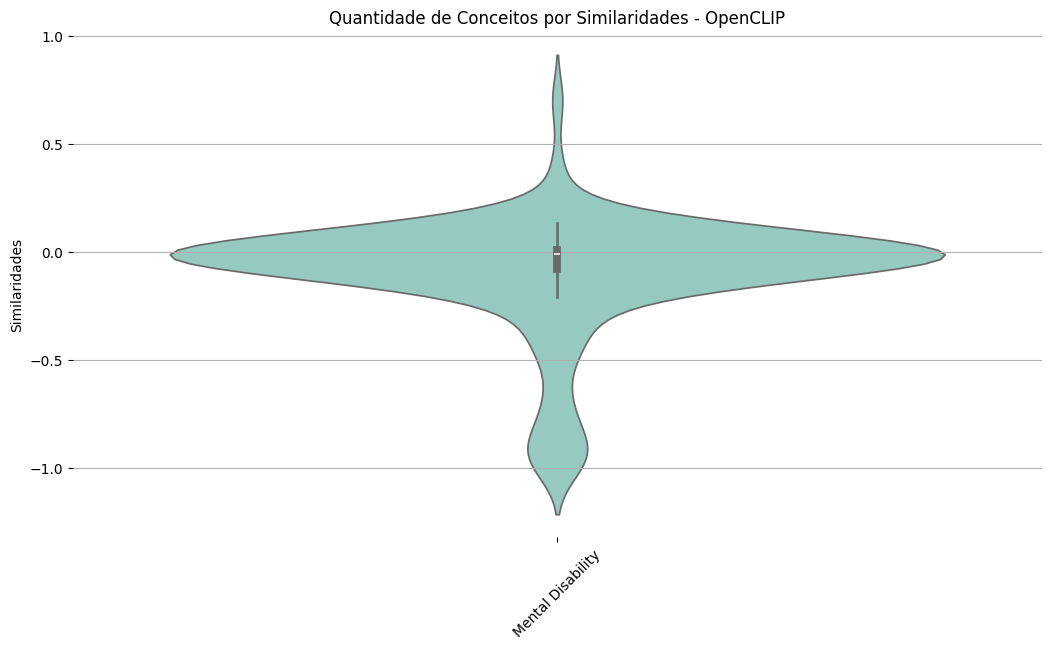

In [7]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='Micro Concept', y='ScoreNorm',hue='Micro Concept',palette="Set3")

plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP")

# Remove border box
sns.despine(trim=True, left=True);

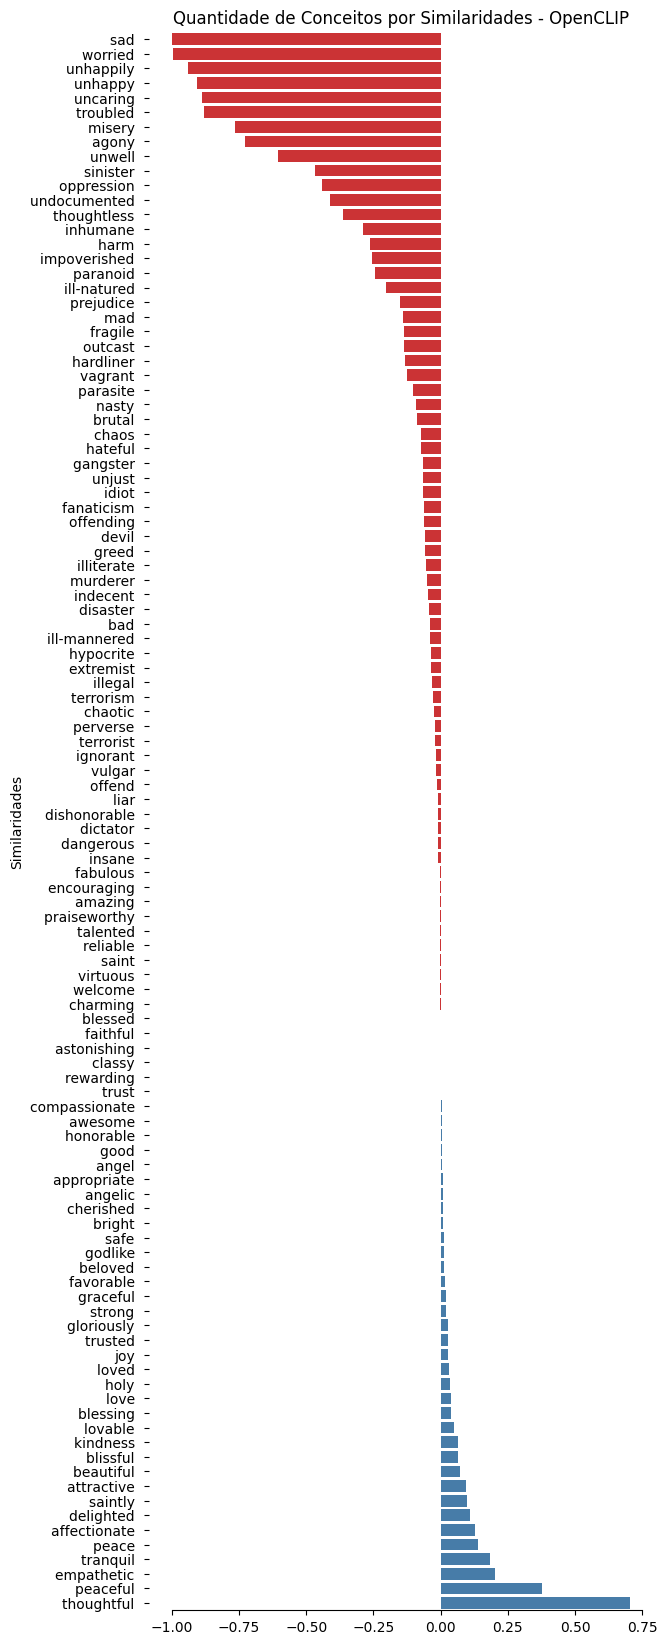

In [8]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()]
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

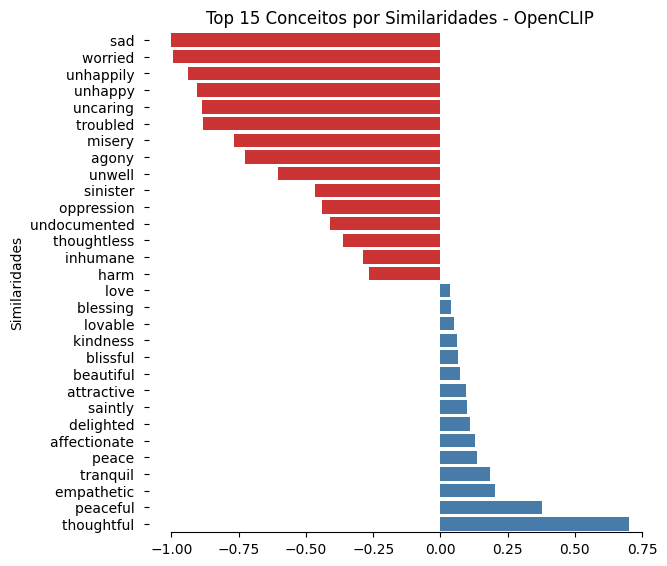

In [9]:
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]+[1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:]]), x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

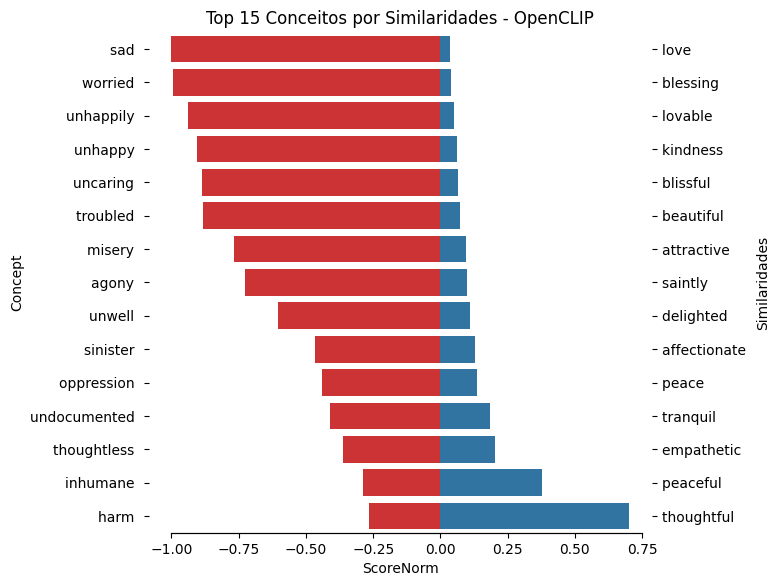

In [10]:
colors_n = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]
colors_p = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes

In [11]:
group_df = df.groupby('Concept').mean().reset_index()
group_df = group_df.sort_values(by=['ScoreNorm'])
group_df

/tmp/ipykernel_888992/147545894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby('Concept').mean().reset_index()


,Concept,Quant,Score,Score/Quant,ScoreNorm
37,fanaticism,-119.428571,-22.811397,-0.188283,-0.409284
108,undocumented,-86.642857,-17.294688,-0.195187,-0.311386
61,impoverished,-75.642857,-15.313096,-0.191148,-0.276221
60,illiterate,-69.785714,-13.178919,-0.185300,-0.238348
34,extremist,-64.642857,-11.832966,-0.181475,-0.214463
...,...,...,...,...,...
26,delighted,92.071429,16.757602,0.184079,0.292902
51,holy,89.642857,17.626568,0.189157,0.308323
14,blessing,95.642857,18.793064,0.188255,0.329023
42,gloriously,113.142857,19.784940,0.175515,0.346625


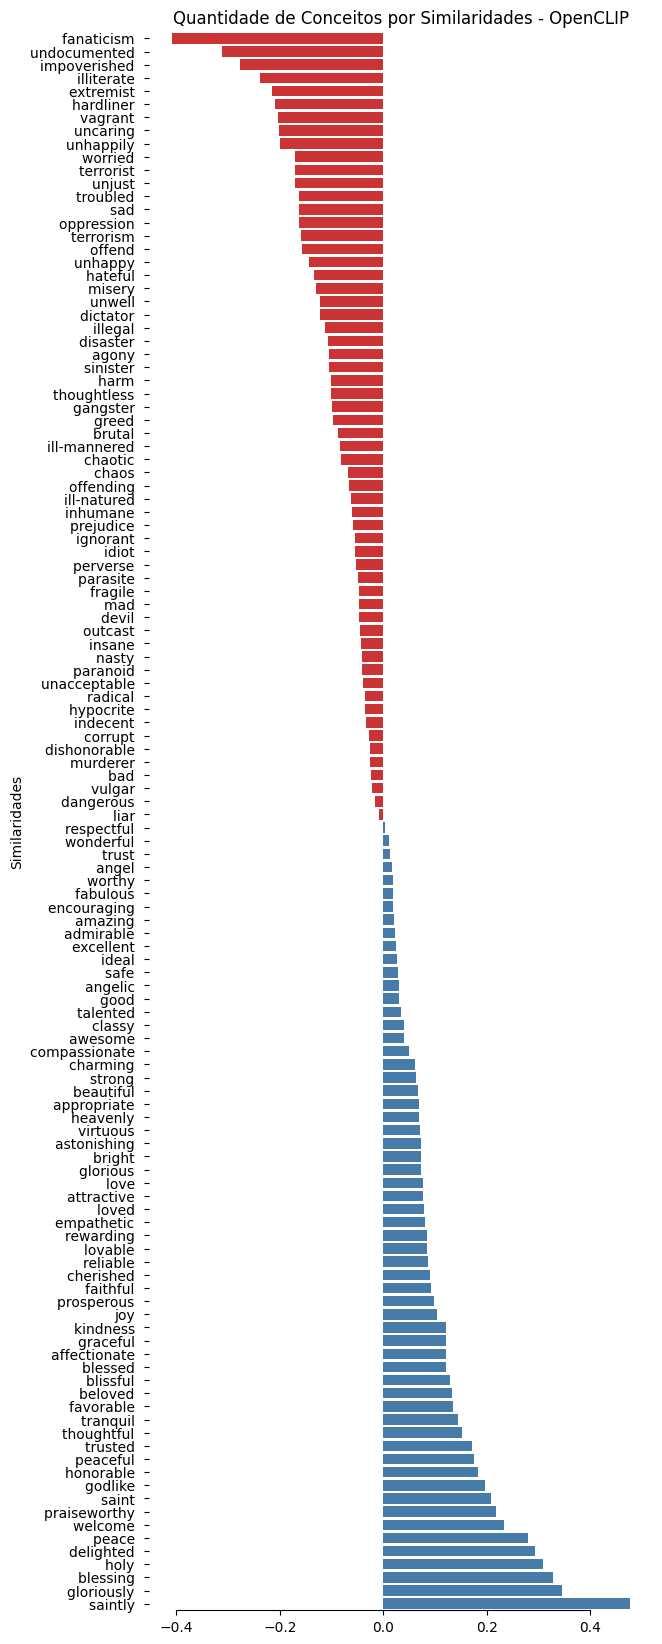

In [12]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=group_df, x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

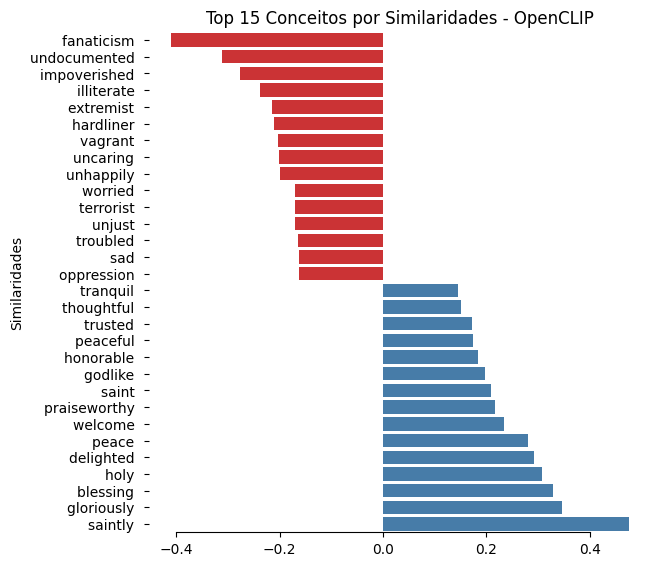

In [13]:
colors_n = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][:15]
colors_p = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([group_df[:15],group_df[-15:]]), x='ScoreNorm', y='Concept',hue=colors_n+colors_p,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);


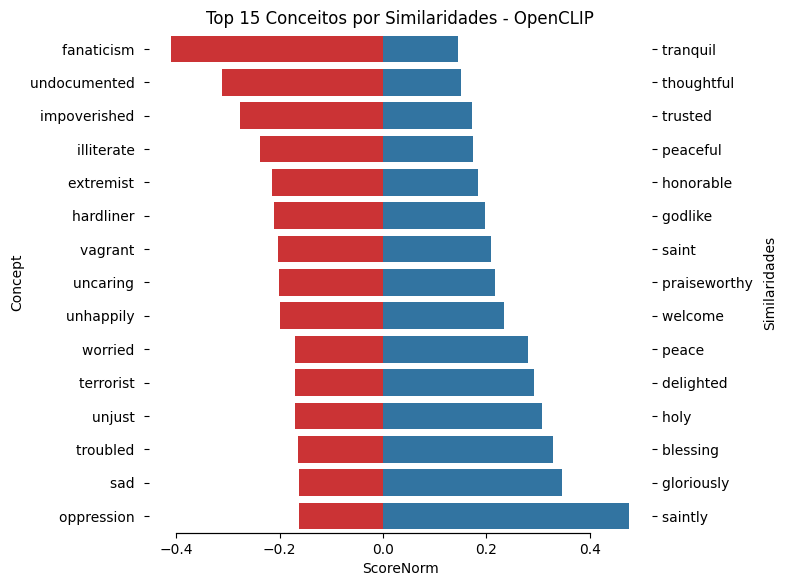

In [14]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=group_df[:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=group_df[-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

# Removing the same dimensions to X and Y

In [15]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results_theta_same_values.txt'
repetitions='1'
bias_type='same_as_X'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{remove_dimensions_list},repetitions-{repetitions},bias_type-{bias_type}'

In [16]:
df = pd.read_csv(csv_file)
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('person','')

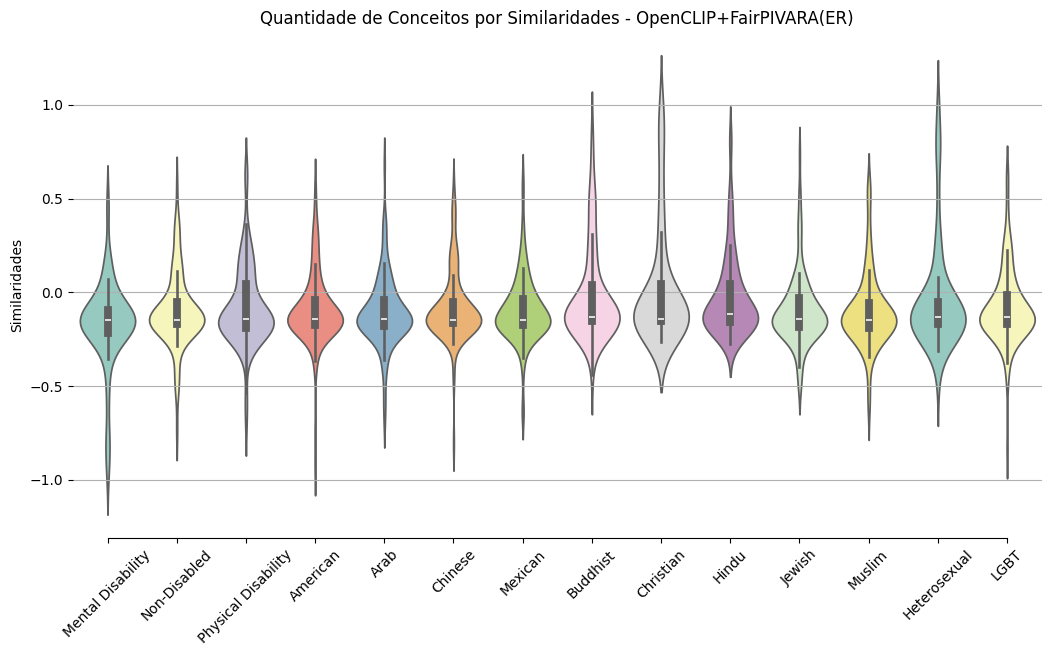

In [17]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(ER)")

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes

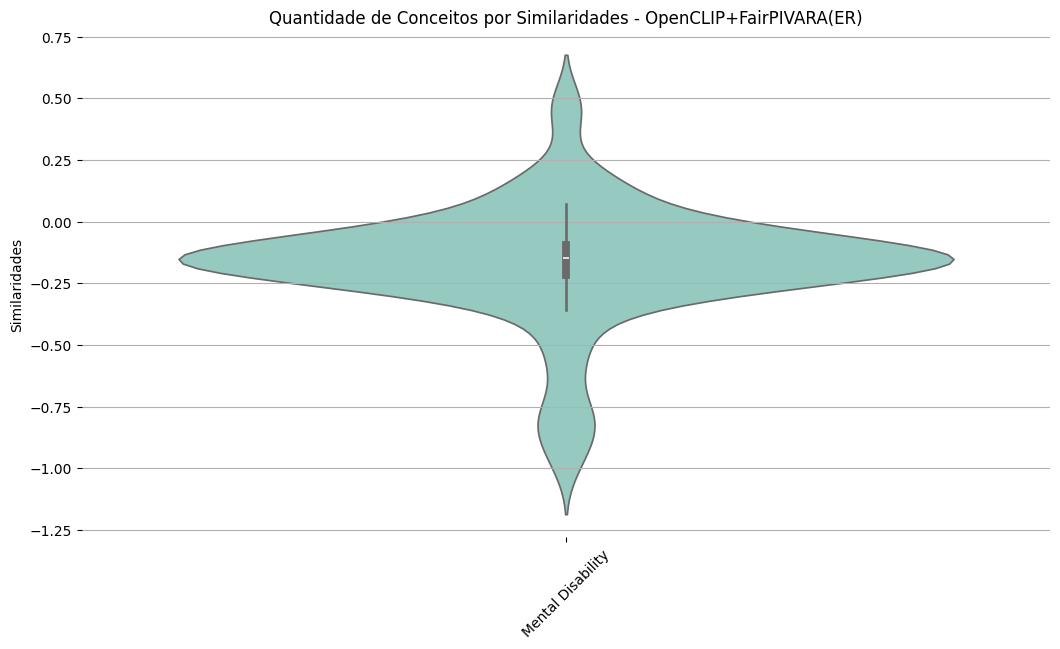

In [18]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='Micro Concept', y='ScoreNorm',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(ER)")

# Remove border box
sns.despine(trim=True, left=True);

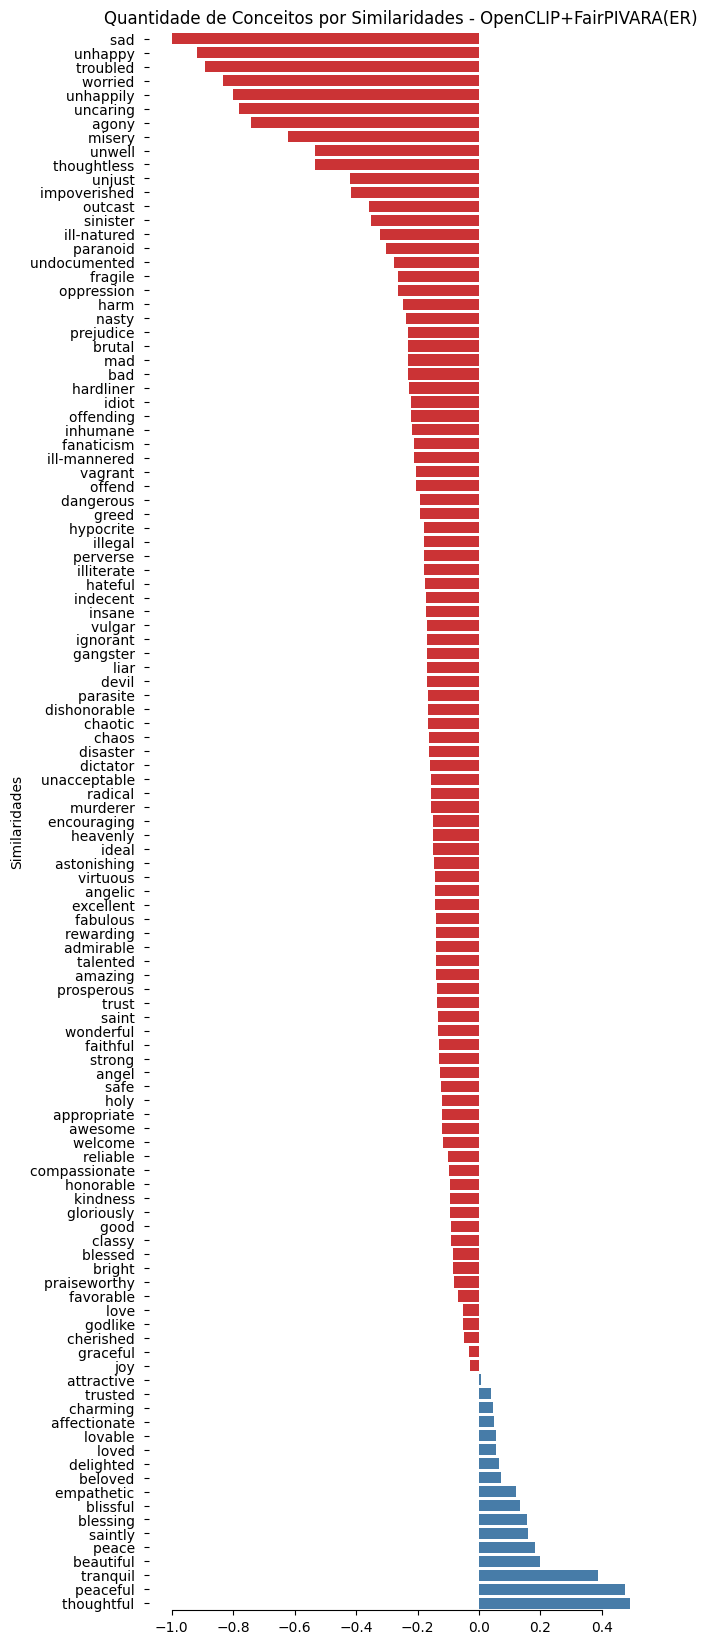

In [19]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()]
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(ER)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

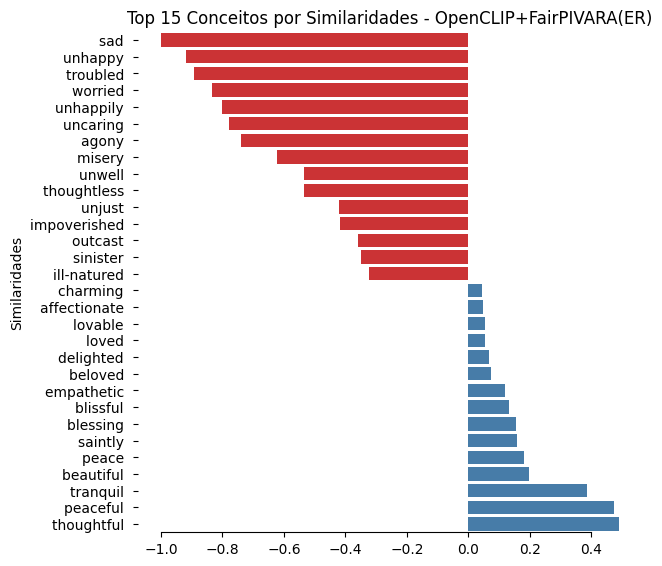

In [20]:
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]+[1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:]]), x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(ER)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

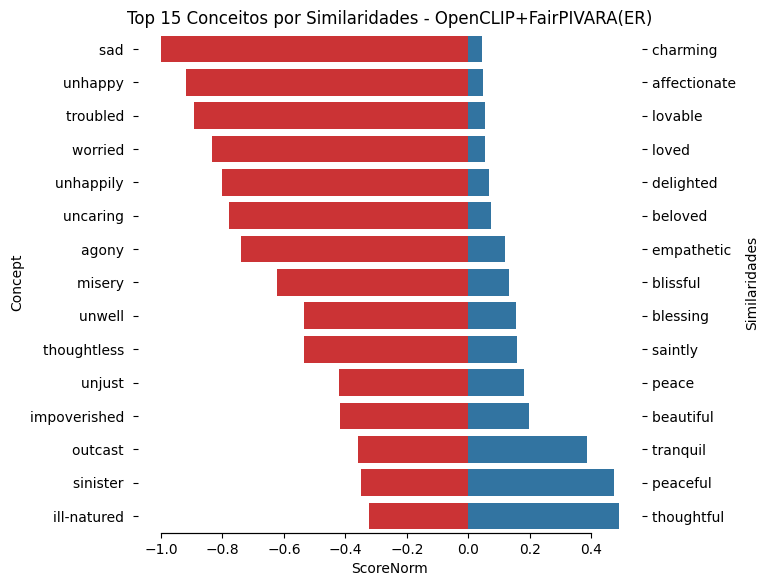

In [21]:
colors_n = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]
colors_p = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(ER)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes


In [22]:
group_df = df.groupby('Concept').mean().reset_index()
group_df = group_df.sort_values(by=['ScoreNorm'])
group_df

/tmp/ipykernel_888992/147545894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby('Concept').mean().reset_index()


,Concept,Quant,Score,ScoreNorm
37,fanaticism,-79.142857,-12.828290,-0.449340
111,unjust,-66.857143,-10.140945,-0.387135
47,hardliner,-45.538462,-7.140452,-0.317681
61,impoverished,-39.153846,-6.838702,-0.310696
108,undocumented,-42.272727,-6.813417,-0.310111
...,...,...,...,...
84,praiseworthy,114.500000,17.677672,0.256797
116,welcome,116.500000,17.839820,0.260551
26,delighted,122.214286,20.016965,0.310946
14,blessing,138.500000,23.964473,0.402321


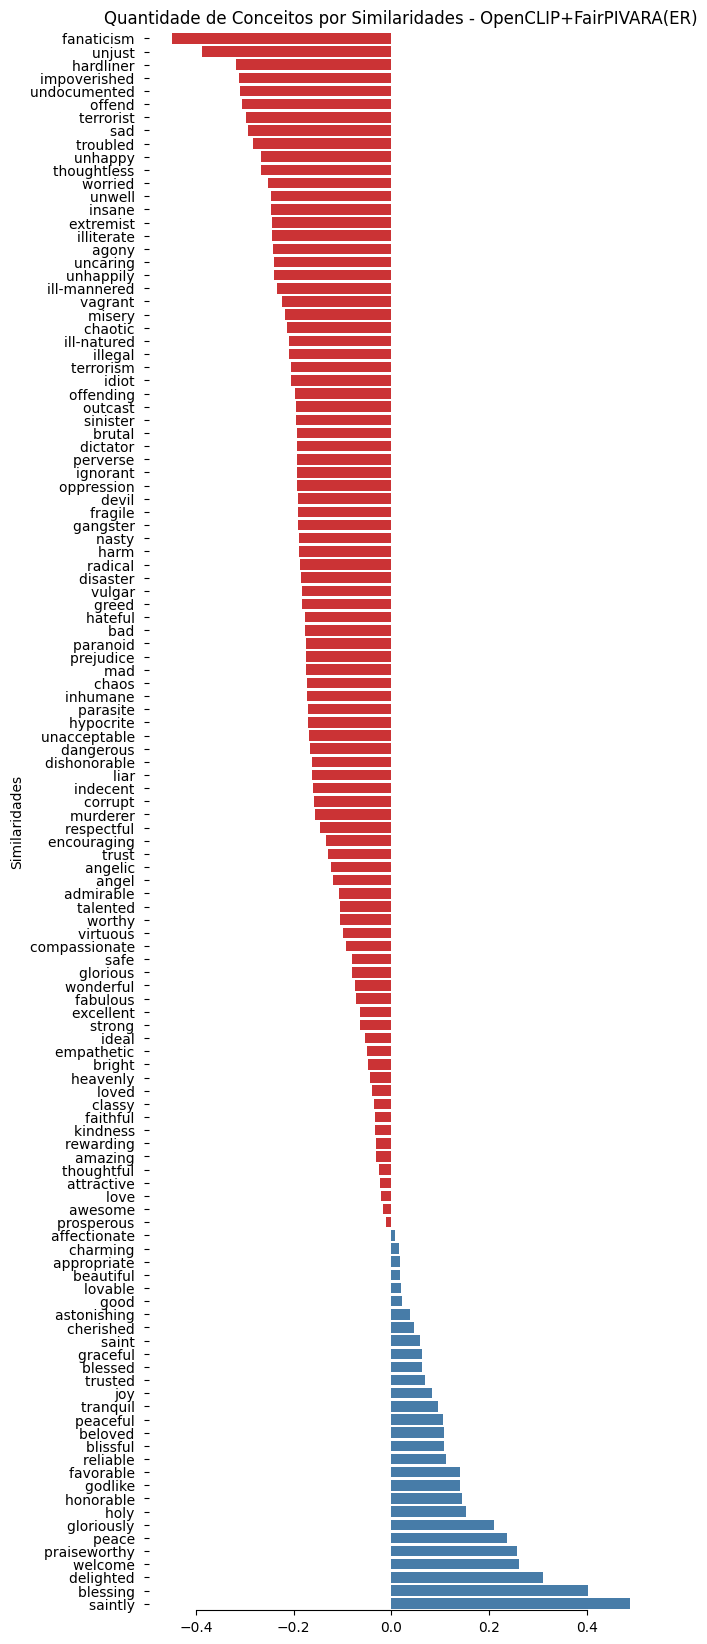

In [23]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=group_df, x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(ER)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

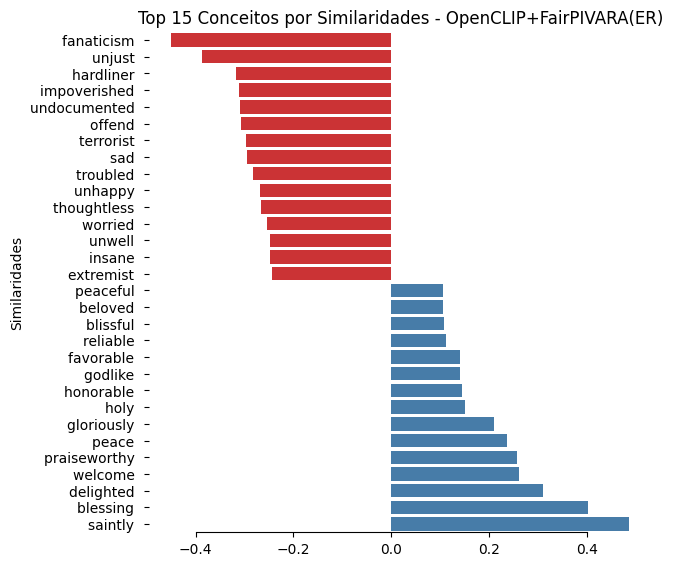

In [24]:
colors_n = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][:15]
colors_p = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([group_df[:15],group_df[-15:]]), x='ScoreNorm', y='Concept',hue=colors_n+colors_p,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(ER)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

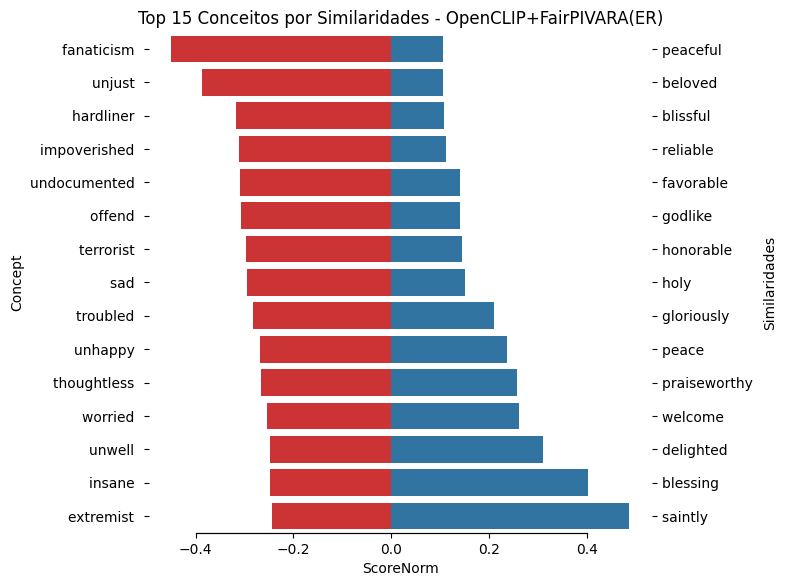

In [25]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=group_df[:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=group_df[-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(ER)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

# Removing the X dimensions, with random Y remove  - 10

In [26]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/theta-001to005/results_theta_same_values.txt'
repetitions='10'
bias_type='random_A_B'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'

df = pd.read_csv(csv_file)
df[['Quant','Score']]=df[['Quant','Score']].div(10)
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('person','')

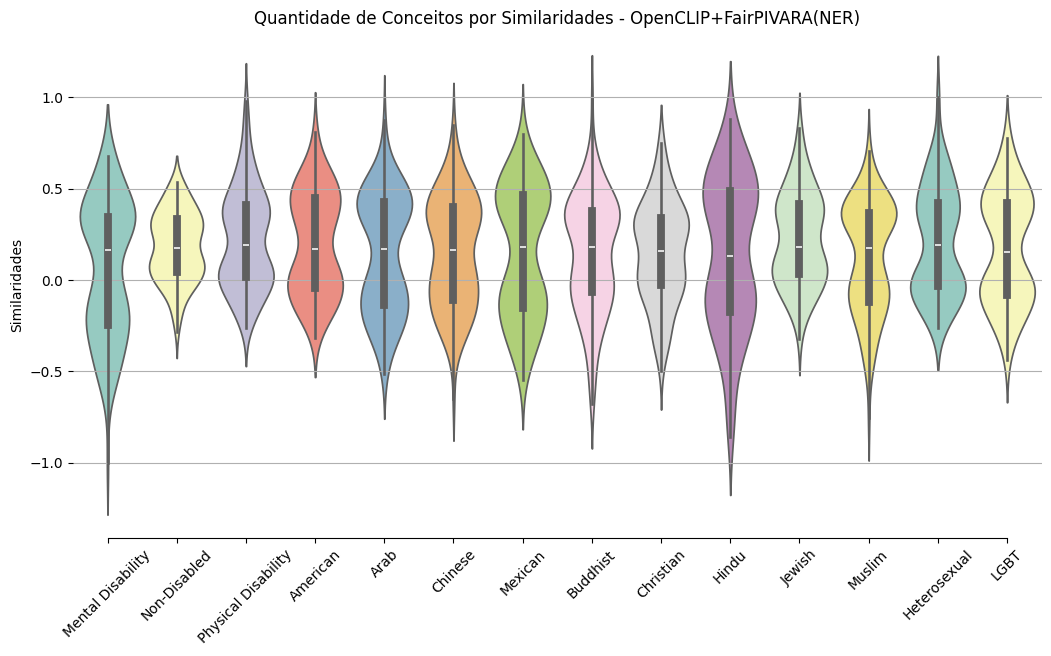

In [27]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")

# Remove border box
sns.despine(trim=True, left=True);

# Removing the X dimensions, with random Y remove  - 100

In [28]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/theta-001to005/results_theta_same_values.txt'
repetitions='1000'
bias_type='random_A_B'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'


In [29]:
df = pd.read_csv(csv_file)
df[['Quant','Score']]=df[['Quant','Score']].div(100)
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('person','')

In [30]:
df['Score/Quant'] = df['Score']/abs(df['Quant'])

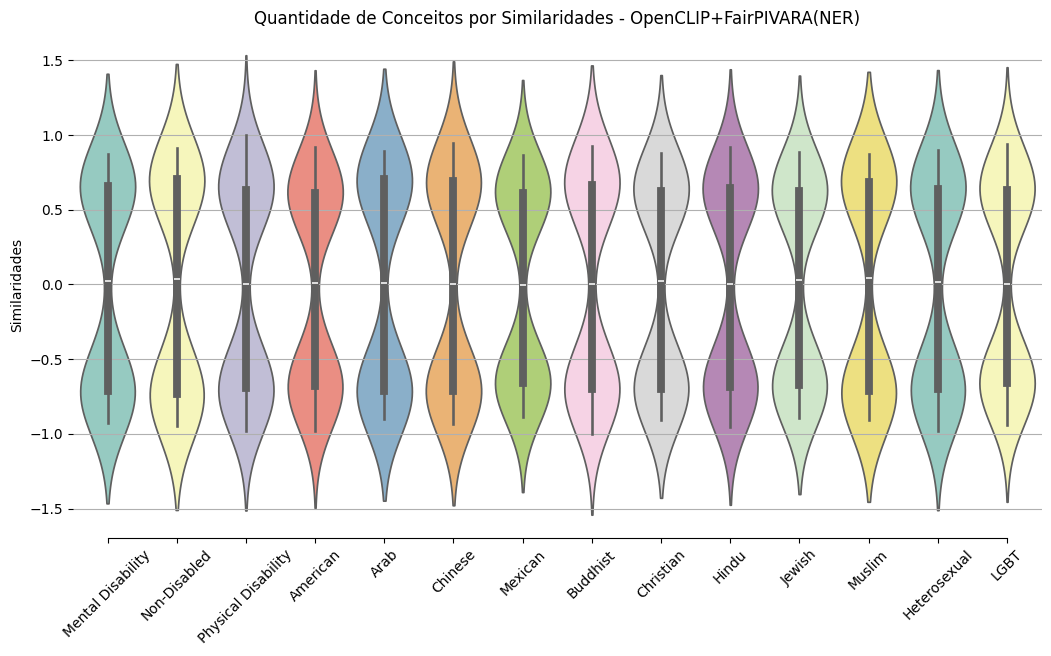

In [31]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")

# Remove border box
sns.despine(trim=True, left=True);

### Resultados apenas para Mental Disability


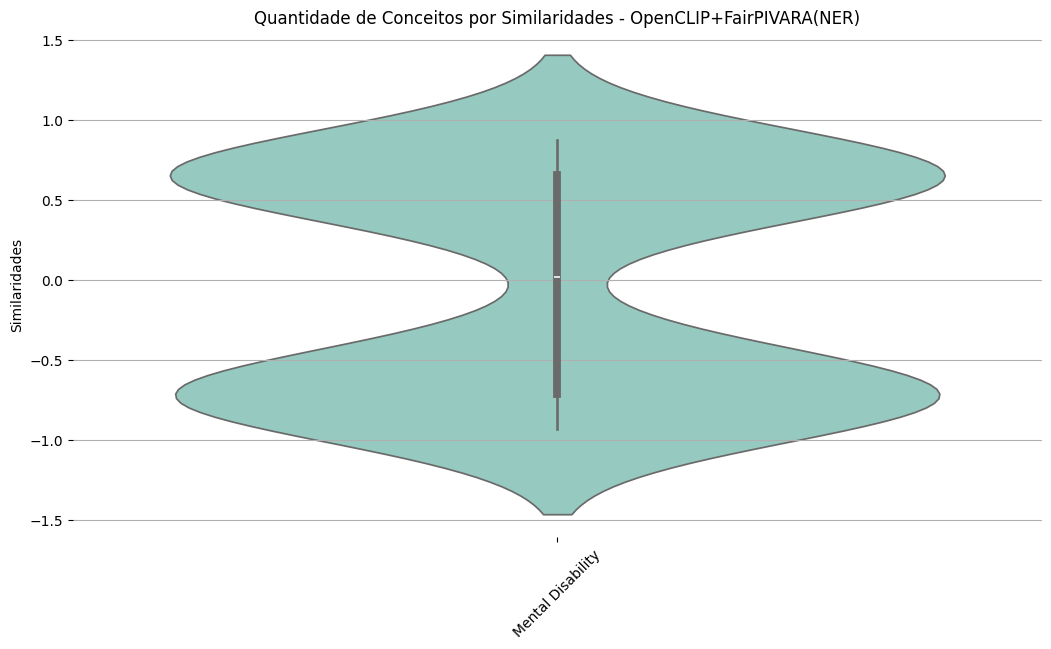

In [32]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='Micro Concept', y='ScoreNorm',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")

# Remove border box
sns.despine(trim=True, left=True);

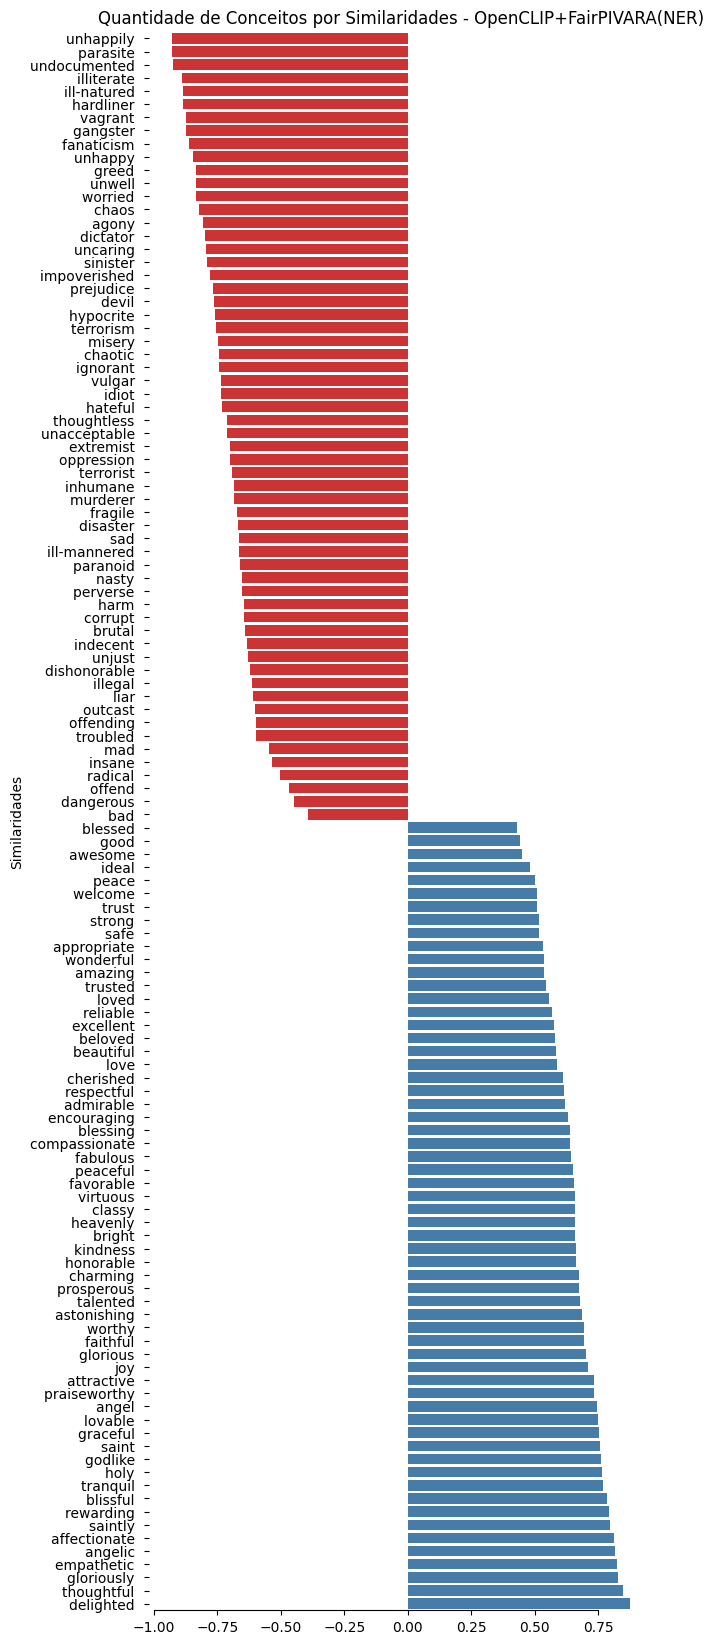

In [33]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()]
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

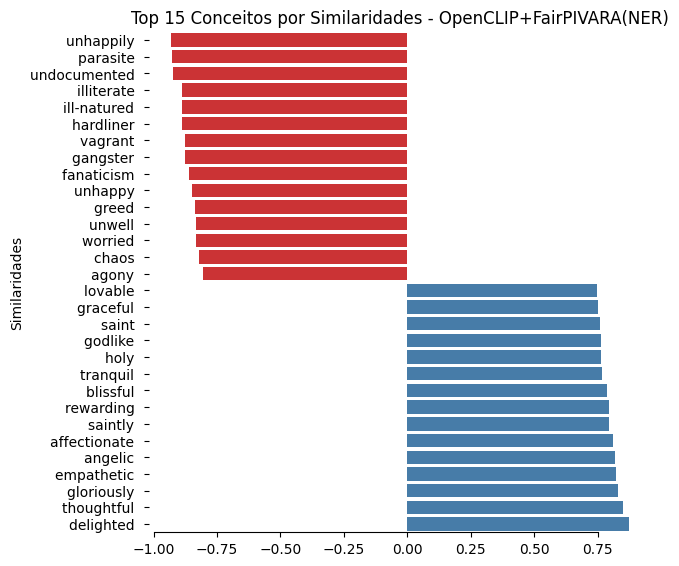

In [34]:
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]+[1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:]]), x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

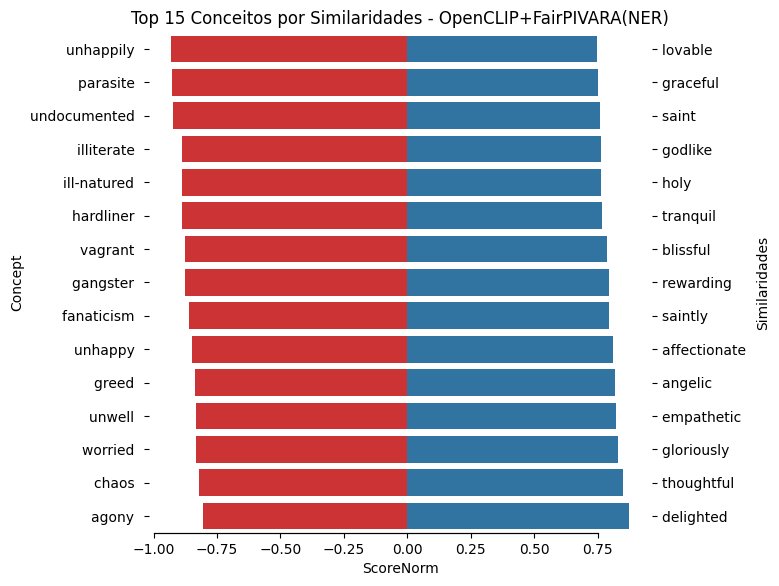

In [35]:
colors_n = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]
colors_p = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes


In [36]:
group_df = df.groupby('Concept').mean().reset_index()
group_df = group_df.sort_values(by=['ScoreNorm'])
group_df


/tmp/ipykernel_888992/1901231878.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby('Concept').mean().reset_index()


,Concept,Quant,Score,ScoreNorm,Score/Quant
108,undocumented,-482.916429,-15.054298,-0.918217,-0.031180
109,unhappily,-451.476429,-14.583837,-0.888641,-0.032303
113,vagrant,-456.048571,-14.495883,-0.883111,-0.031792
58,ill-natured,-448.958571,-14.175742,-0.862985,-0.031614
47,hardliner,-436.180000,-13.994819,-0.851611,-0.032111
...,...,...,...,...,...
42,gloriously,372.522857,12.329167,0.803288,0.033090
5,angelic,377.452857,12.611794,0.821056,0.033409
100,thoughtful,387.826429,13.024237,0.846985,0.033587
31,empathetic,394.089286,13.055461,0.848948,0.033141


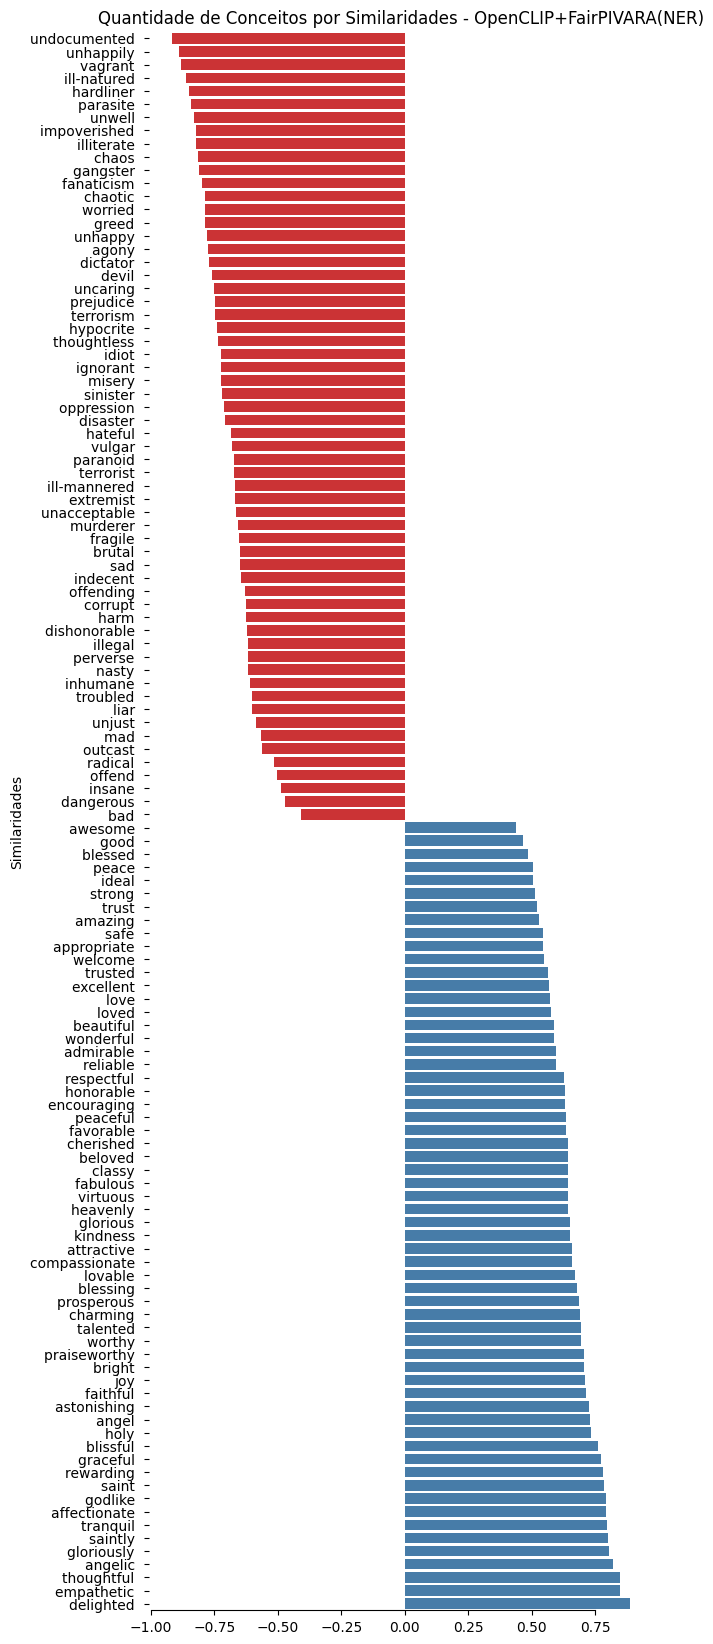

In [37]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=group_df, x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

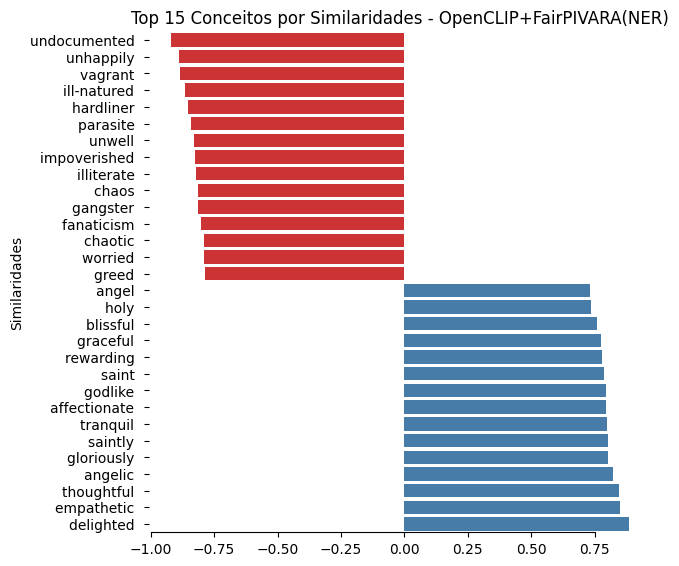

In [38]:
colors_n = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][:15]
colors_p = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([group_df[:15],group_df[-15:]]), x='ScoreNorm', y='Concept',hue=colors_n+colors_p,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

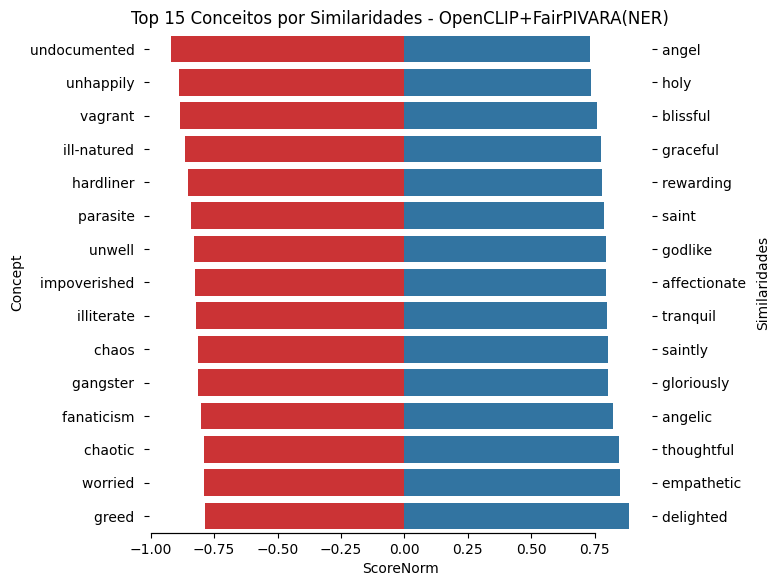

In [39]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=group_df[:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=group_df[-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(NER)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

## Aleatório

In [40]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/theta-001to005/results_theta_same_values.txt'
repetitions='1'
bias_type='random'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'

In [41]:
df = pd.read_csv(csv_file)
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('person','')

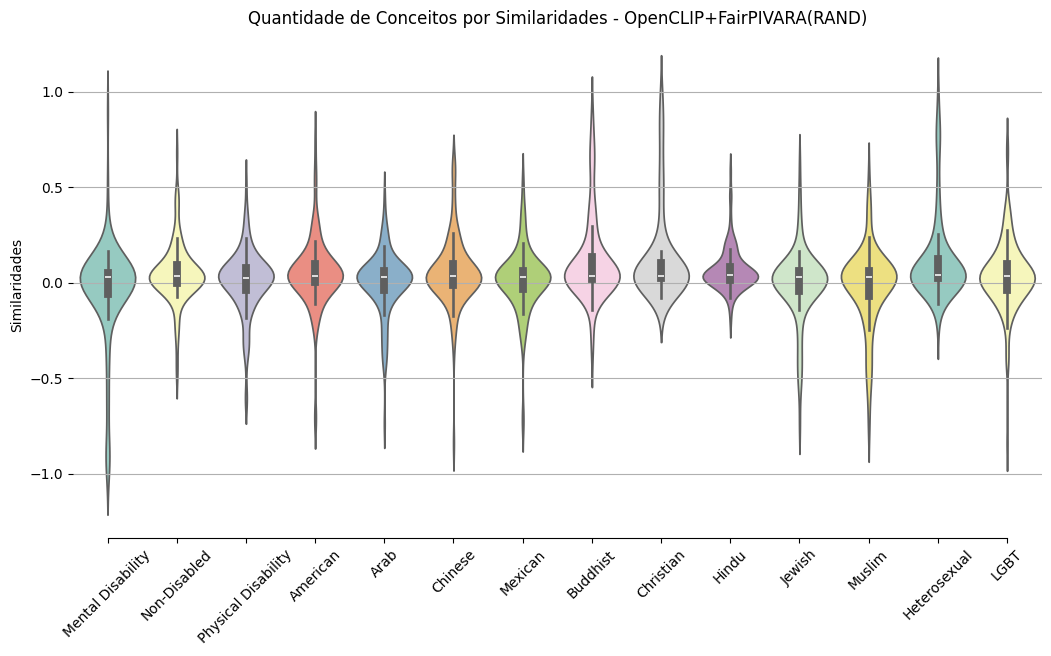

In [42]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(RAND)")

# Remove border box
sns.despine(trim=True, left=True);

### Resultados apenas para Mental Disability


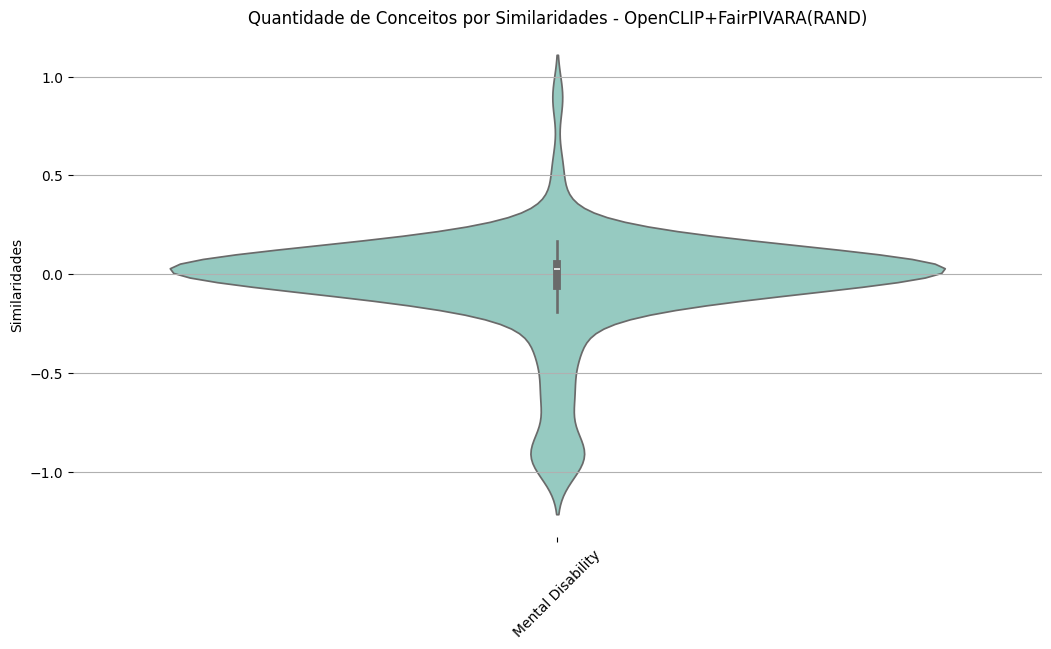

In [43]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='Micro Concept', y='ScoreNorm',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(RAND)")

# Remove border box
sns.despine(trim=True, left=True);

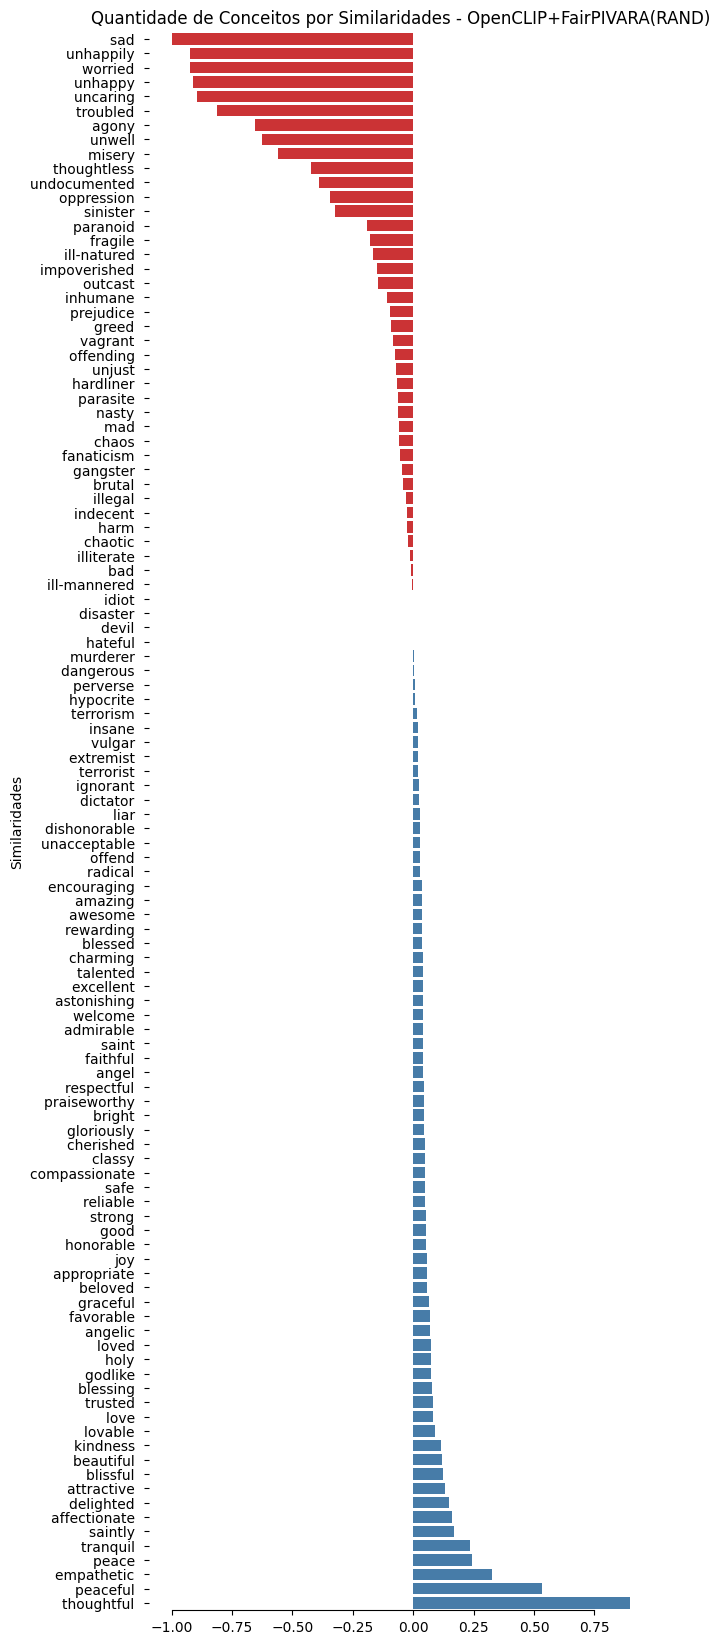

In [44]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()]
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(RAND)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

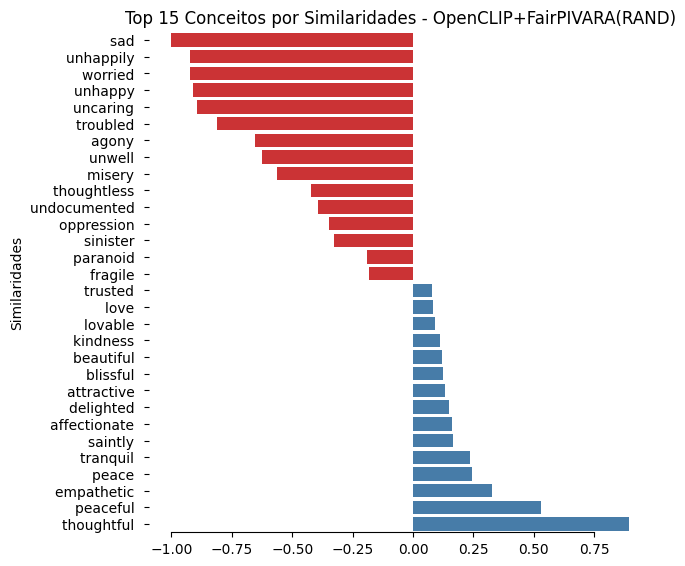

In [45]:
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]+[1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:]]), x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(RAND)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

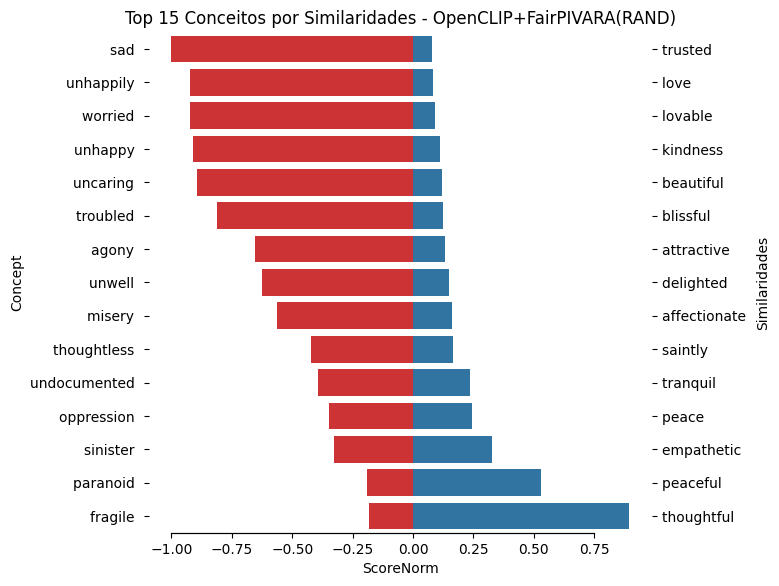

In [46]:
colors_n = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]
colors_p = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(RAND)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes


In [47]:
group_df = df.groupby('Concept').mean().reset_index()
group_df = group_df.sort_values(by=['ScoreNorm'])
group_df

/tmp/ipykernel_888992/147545894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby('Concept').mean().reset_index()


,Concept,Quant,Score,ScoreNorm
37,fanaticism,-111.785714,-19.400837,-0.346589
108,undocumented,-83.714286,-14.931869,-0.259126
61,impoverished,-76.071429,-13.101383,-0.223301
60,illiterate,-73.857143,-12.120014,-0.204094
47,hardliner,-64.153846,-10.740628,-0.177098
...,...,...,...,...
26,delighted,89.571429,14.126460,0.309581
51,holy,96.857143,16.073797,0.347693
14,blessing,99.071429,16.162595,0.349431
42,gloriously,112.142857,17.352369,0.372716


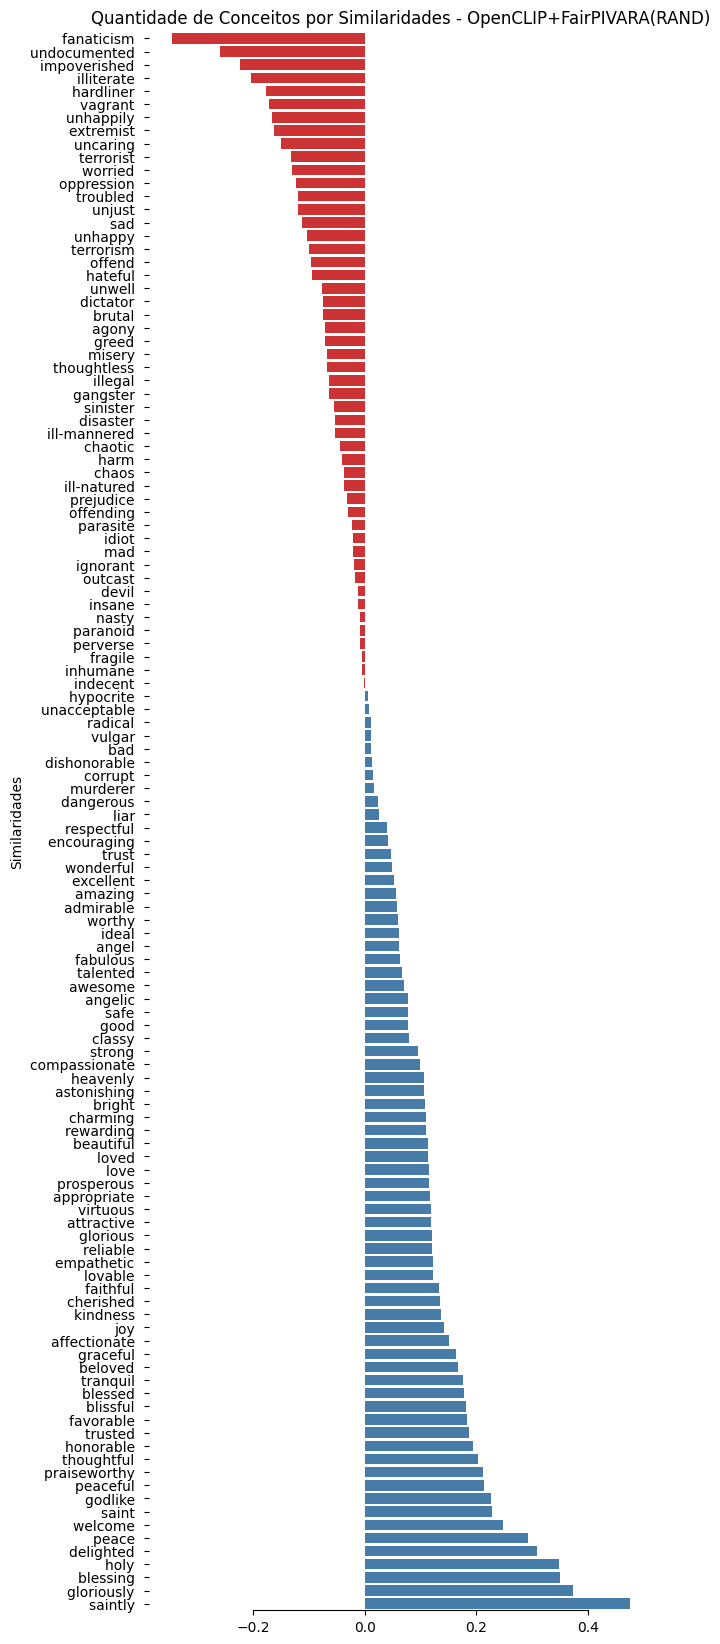

In [48]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=group_df, x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - OpenCLIP+FairPIVARA(RAND)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

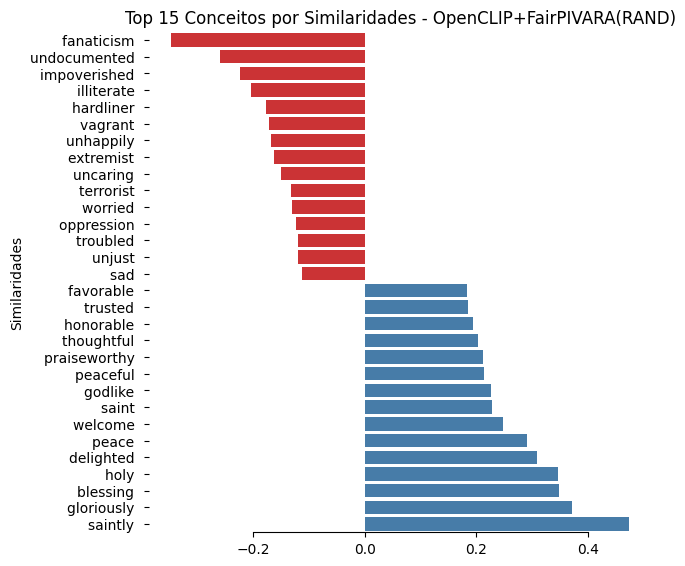

In [49]:
colors_n = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][:15]
colors_p = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([group_df[:15],group_df[-15:]]), x='ScoreNorm', y='Concept',hue=colors_n+colors_p,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(RAND)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

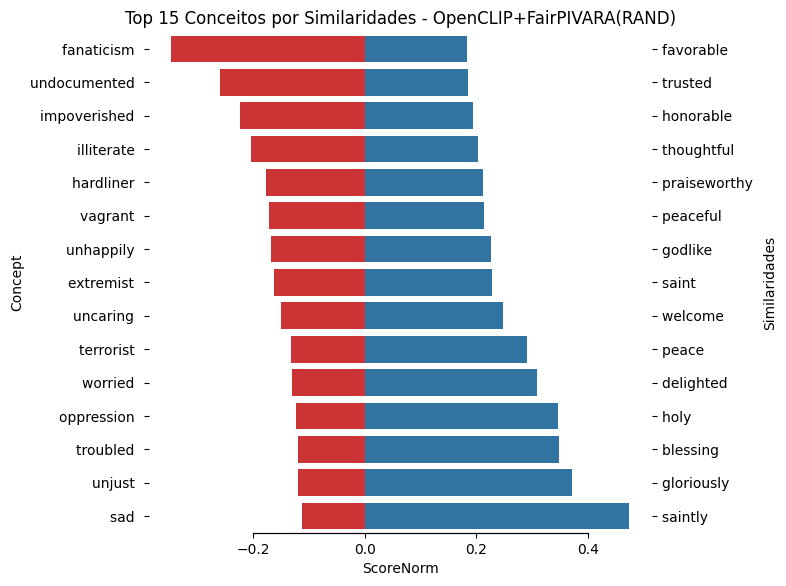

In [50]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=group_df[:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=group_df[-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - OpenCLIP+FairPIVARA(RAND)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);